# HomeWork 5 Juypter Book

# Matthew Anderson | 801203905

# Github https://github.com/Mand187/Deep-Learning

NOTE FOR GRADER : THIS NOTEBOOK REQUIRES MULTIPLE FILES AS OUTLINE IN THE IMPORT LIST, OTHERWISE THIS WILL NOT WORK

# Problem 2

You will fine-tune pretrained Swin Transformer models from the Hugging Face Transformers library—specifically the Tiny (microsoft/swin-tiny-patch4-window7-224) and Small (microsoft/swin-small-patch4-window7-224) variants - on CIFAR-100 and compare their performance to a Swin Transformer trained from scratch. Start by loading these pretrained models using SwinForImageClassification.from_pretrained(), adjusting the classification head for 100 classes and freezing the backbone to train only the head. Fine-tune both models for  2-5epochs with a batch size of 32, a learning rate of 2e-5, the Adam optimizer. Measure training time per epoch and final test accuracy for each. In your report, present a table with these results and discuss the benefits and drawbacks of fine-tuning versus training from scratch, the differences between Swin-Tiny and Swin-Small in this context, and reasons why pretrained models might outperform or underperform the scratch model.

In [8]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from model.VIT import VisionTransformer
from model.ResNet18 import ResNet18
from data.dataloader import *
from training.trainII import *
from training.basicEval import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from transformers import SwinForImageClassification


def get_pretrained_swin(model_name="microsoft/swin-tiny-patch4-window7-224"):
    model = SwinForImageClassification.from_pretrained(model_name)
    model.classifier = nn.Linear(model.classifier.in_features, 100)  # CIFAR-100 classes
    return model

def freeze_backbone(model):
    for name, param in model.named_parameters():
        if "classifier" not in name:
            param.requires_grad = False

In [3]:
train_loader, test_loader = getDataLoaders(
    dataset_name='cifar100',
    batch_size=128,
    image_size=224,    # Resize to 224x224 for ViT
    num_workers=2,
)

# Swin Tiny

In [4]:
swin_tiny = get_pretrained_swin("microsoft/swin-tiny-patch4-window7-224")
freeze_backbone(swin_tiny)

config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

C:\Users\flyer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\flyer\.cache\huggingface\hub\models--microsoft--swin-tiny-patch4-window7-224. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

In [9]:
trainer_tiny = Trainer(swin_tiny, train_loader, test_loader)
trainer_tiny.earlyStop(True, patience=3, delta=0.5)
train_losses, val_losses, train_accs, val_accs, epoch_times, true_labels_all, pred_labels_all = trainer_tiny.train(num_epochs=5, learningRate=2e-5)


Training on device: cuda


Training Progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1/5 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2/5 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 2/5 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3/5 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 3/5 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4/5 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 4/5 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5/5 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 5/5 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]


Training complete in 912.06 seconds, or 15.20 minutes
Total epochs run: 5
Average time per epoch: 182.41 seconds
Inference time per batch: 0.47 seconds
Final Training Loss: 2.5259
Final Validation Loss: 2.4485
Final Training Accuracy: 59.73%
Final Validation Accuracy: 60.66%


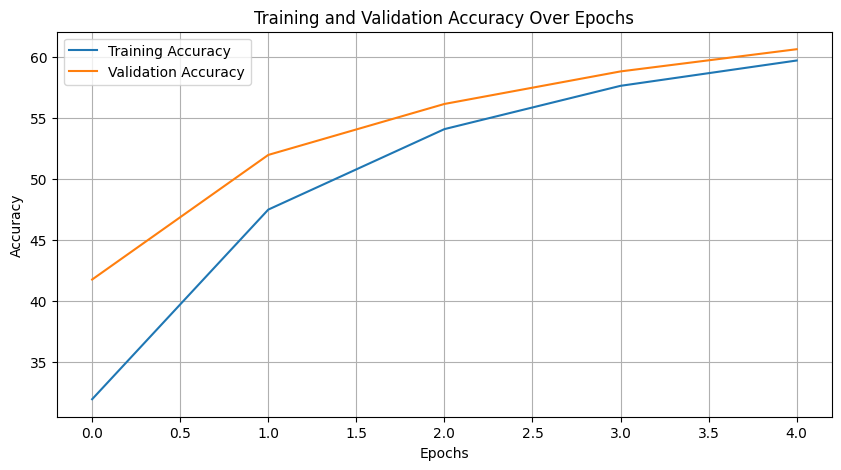

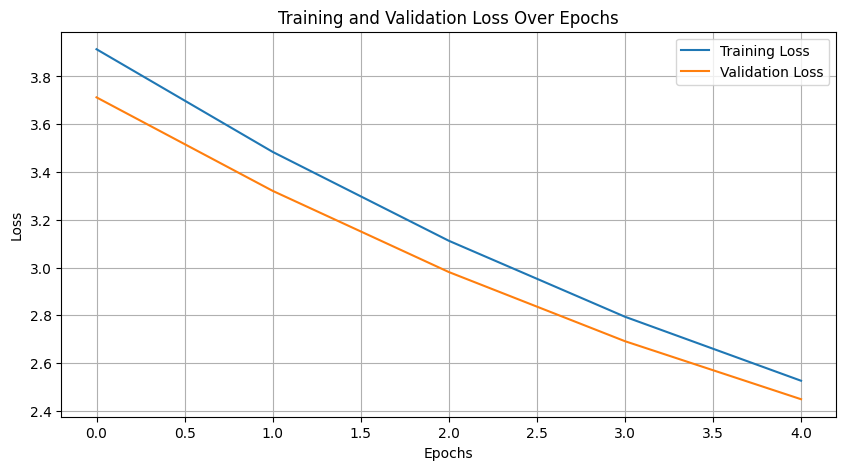

In [10]:
plotAccuracy(train_accs, val_accs)
plotLoss(train_losses, val_losses)

# Swin Small

In [11]:
swin_small = get_pretrained_swin("microsoft/swin-small-patch4-window7-224")
freeze_backbone(swin_small)

config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

C:\Users\flyer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\flyer\.cache\huggingface\hub\models--microsoft--swin-small-patch4-window7-224. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/199M [00:00<?, ?B/s]

In [12]:
trainer_small = Trainer(swin_small, train_loader, test_loader)
trainer_small.earlyStop(True, patience=3, delta=0.5)
train_losses, val_losses, train_accs, val_accs, epoch_times, true_labels_all, pred_labels_all = trainer_small.train(num_epochs=5, learningRate=2e-5)


Training on device: cuda


Training Progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/199M [00:00<?, ?B/s]

Epoch 1/5 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2/5 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 2/5 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3/5 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 3/5 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4/5 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 4/5 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5/5 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 5/5 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]


Training complete in 1482.83 seconds, or 24.71 minutes
Total epochs run: 5
Average time per epoch: 296.57 seconds
Inference time per batch: 0.76 seconds
Final Training Loss: 2.6441
Final Validation Loss: 2.5262
Final Training Accuracy: 61.00%
Final Validation Accuracy: 62.45%


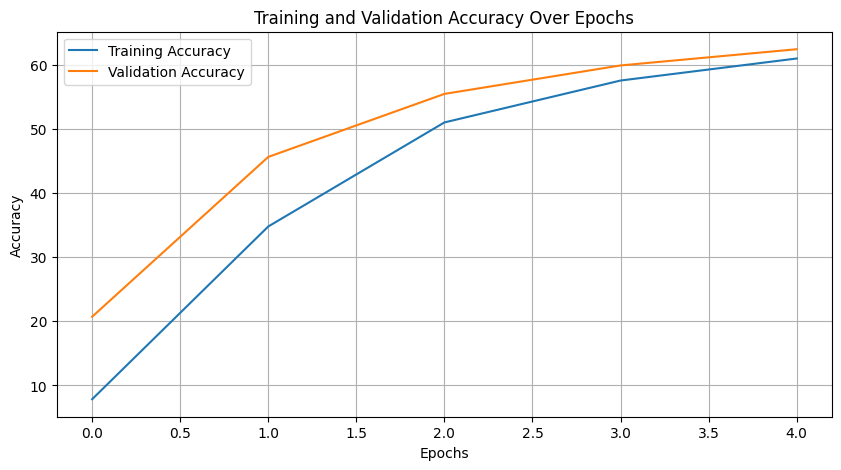

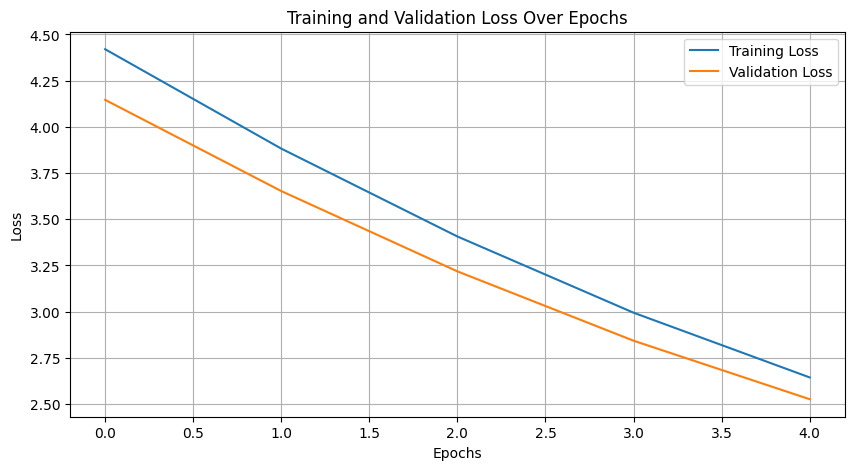

In [13]:
plotAccuracy(train_accs, val_accs)
plotLoss(train_losses, val_losses)